The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc. 

* Channel: customers Channel - - 1 (Hotel), 2(Retail)
* Region: customers Region - Region 1, 2, 3
* Fresh: annual spending on fresh products
* Milk: annual spending on milk products
* Grocery: annual spending on grocery products
* Frozen: annual spending on frozen products
* Detergents_Paper: annual spending on detergents and paper products
* Delicassen: annual spending on and delicatessen products

We will first import the required libraries:

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Next, let’s read the data and look at the first five rows:

In [2]:
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We have the spending details of customers on different products like Milk, Grocery, Frozen, Detergents, etc. Now, we have to segment the customers based on these provided details. Before doing that, let’s pull out some statistics related to the data:

In [3]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


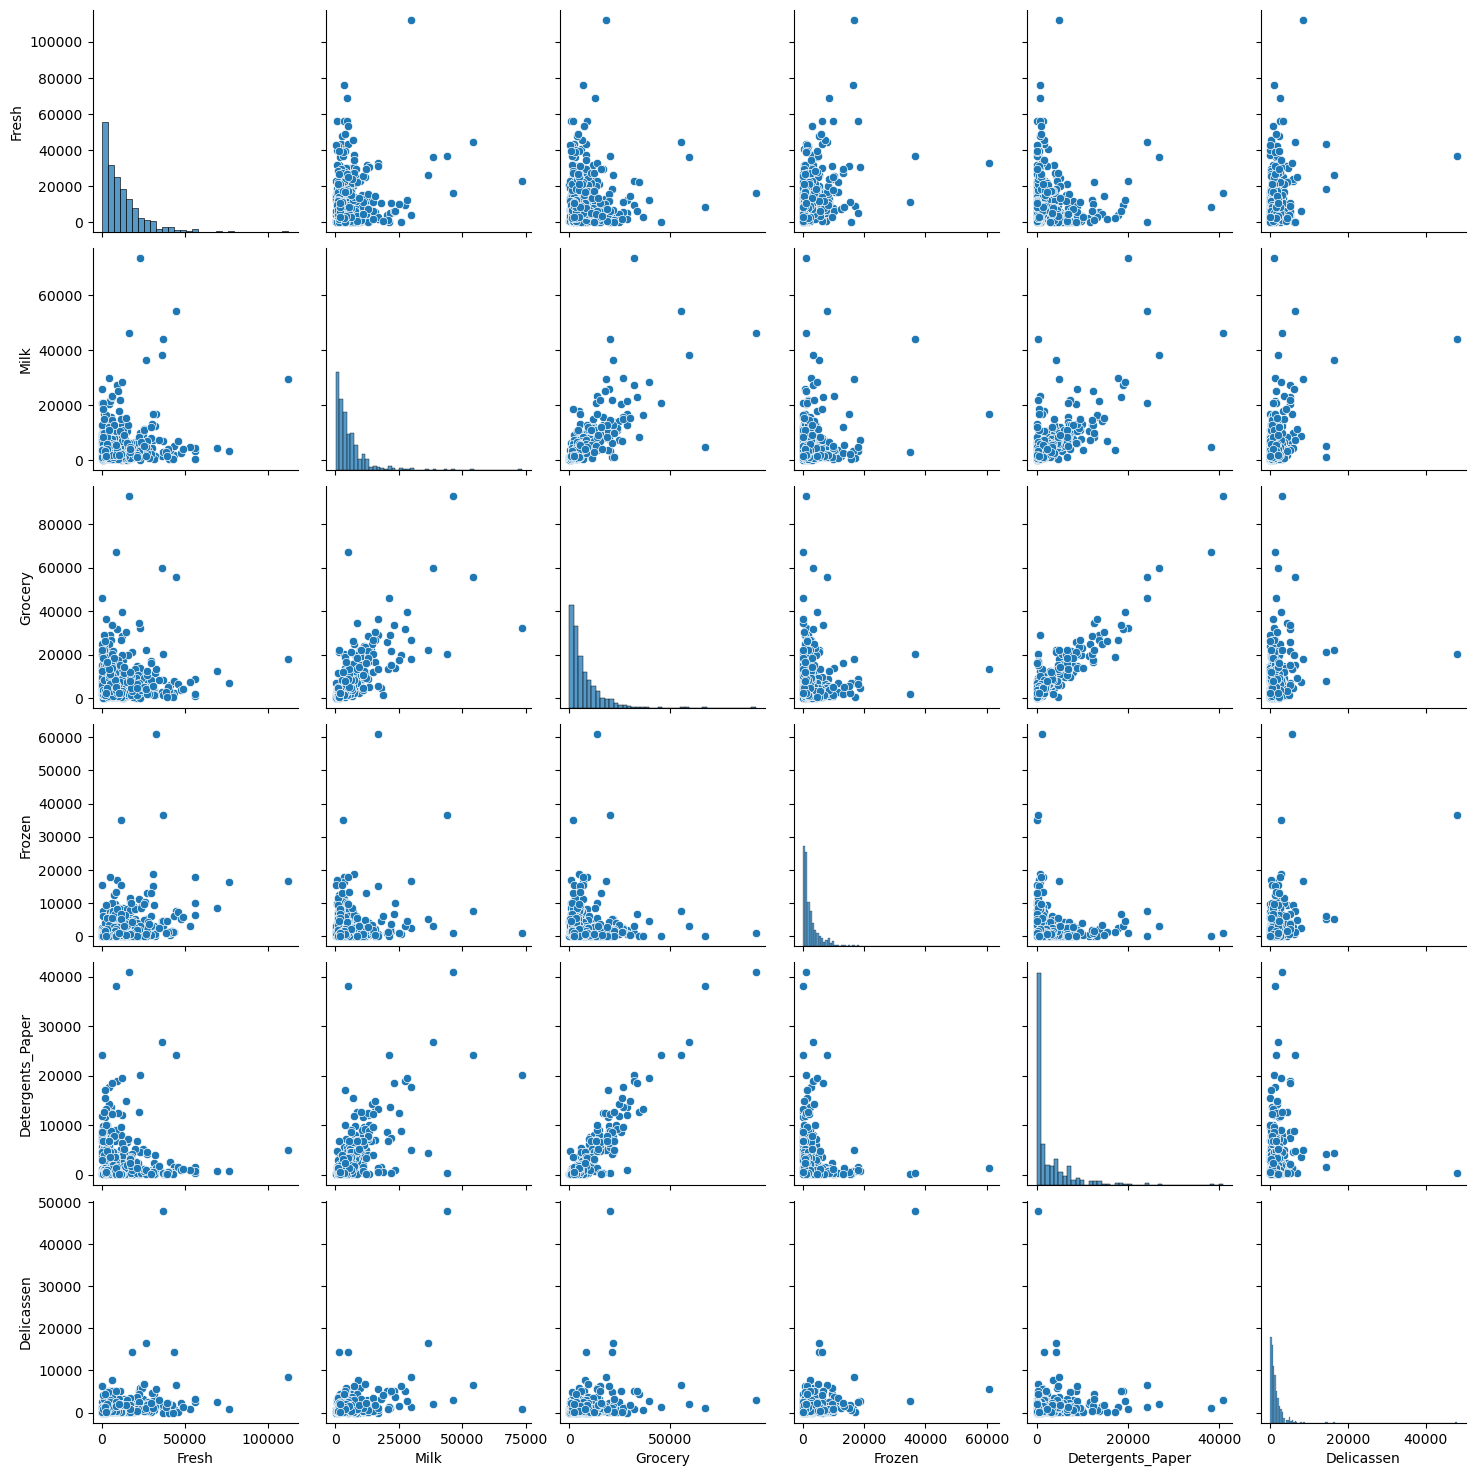

In [4]:
sns.pairplot(data.drop(["Channel","Region"],axis=1))

Here, we see that there is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Next, let’s import and crete our model:

In [6]:
from sklearn.cluster import KMeans

Let's start with 2 clusters, then we can optimize it later on. And as we discussed, for initialization we will use kmeans++, instead of random

In [7]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=101)

In [8]:
kmeans.fit(data_scaled)

KMeans(n_clusters=2, random_state=101)

In [9]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [10]:
kmeans.inertia_

2599.38555935614

In [11]:
from sklearn import metrics
metrics.silhouette_score(data_scaled, kmeans.labels_)

0.37323636511581165

Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the Within-Cluster-Sum-of-Squares (WCSS) (its called inertia under k-means) value of each model

In [12]:
wcss = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=101)
    kmeans.fit(data_scaled)
    pred=kmeans.predict(data_scaled)
    wcss.append(kmeans.inertia_)

Let's take a look at wcss values.

At each loop, as the number of clusters increase, we added the wcss value to our list. And as you can see, it is decreasing as the number of clusters increase

In [13]:
wcss

[3520.0,
 2599.38555935614,
 2149.283956221759,
 1851.840872274385,
 1561.7923349116595,
 1314.6800280812558,
 1186.9905762531268,
 1050.3500044371567,
 980.5319243919294,
 909.7878752404135,
 859.4517085888667,
 824.1211592611961,
 760.9729551560463,
 727.9016839652716,
 673.5556557733771,
 645.7848395785525,
 624.4906228302983,
 594.7396842683268,
 586.5081757691759]

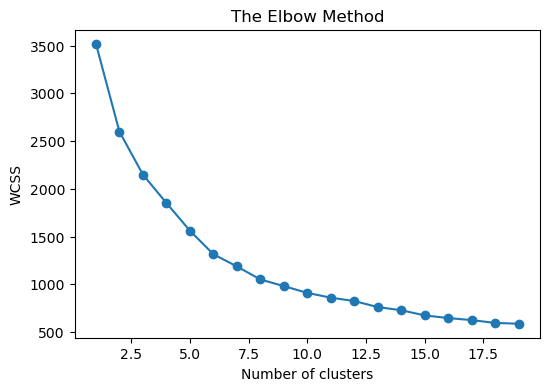

In [14]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Can you tell the optimum cluster value from this plot? Looking at the above elbow curve, we can choose any number of clusters between 6 to 10. 

In [15]:
s_score = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=101)
    kmeans.fit(data_scaled)
    pred=kmeans.predict(data_scaled)
    s_score.append(metrics.silhouette_score(data_scaled, pred))

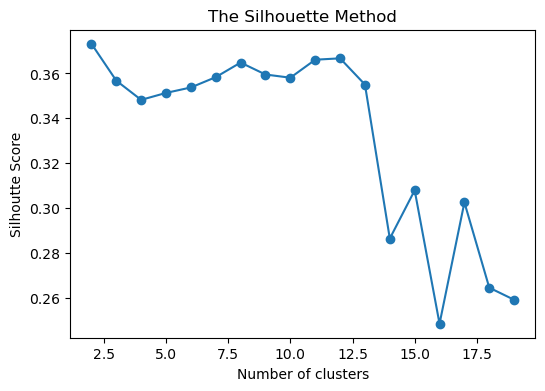

In [16]:
plt.figure(figsize=(6,4))
plt.plot(range(2, 20), s_score, marker='o')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

8 clusters seems to be a good number of clusters to choose according to the Silhoutte method. (If 2 clusters is enough, then 2 clusters seem to be the best but usually 2 clusters create rather large groupings to draw any meaning)

In [17]:
kmeans = KMeans(n_clusters = 8, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [18]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame.head()

,0,1,2,3,4,5,6,7,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,6
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0


In [19]:
frame['cluster'].value_counts()

6    170
0     93
1     86
4     43
7     35
5      6
2      6
3      1
Name: cluster, dtype: int64

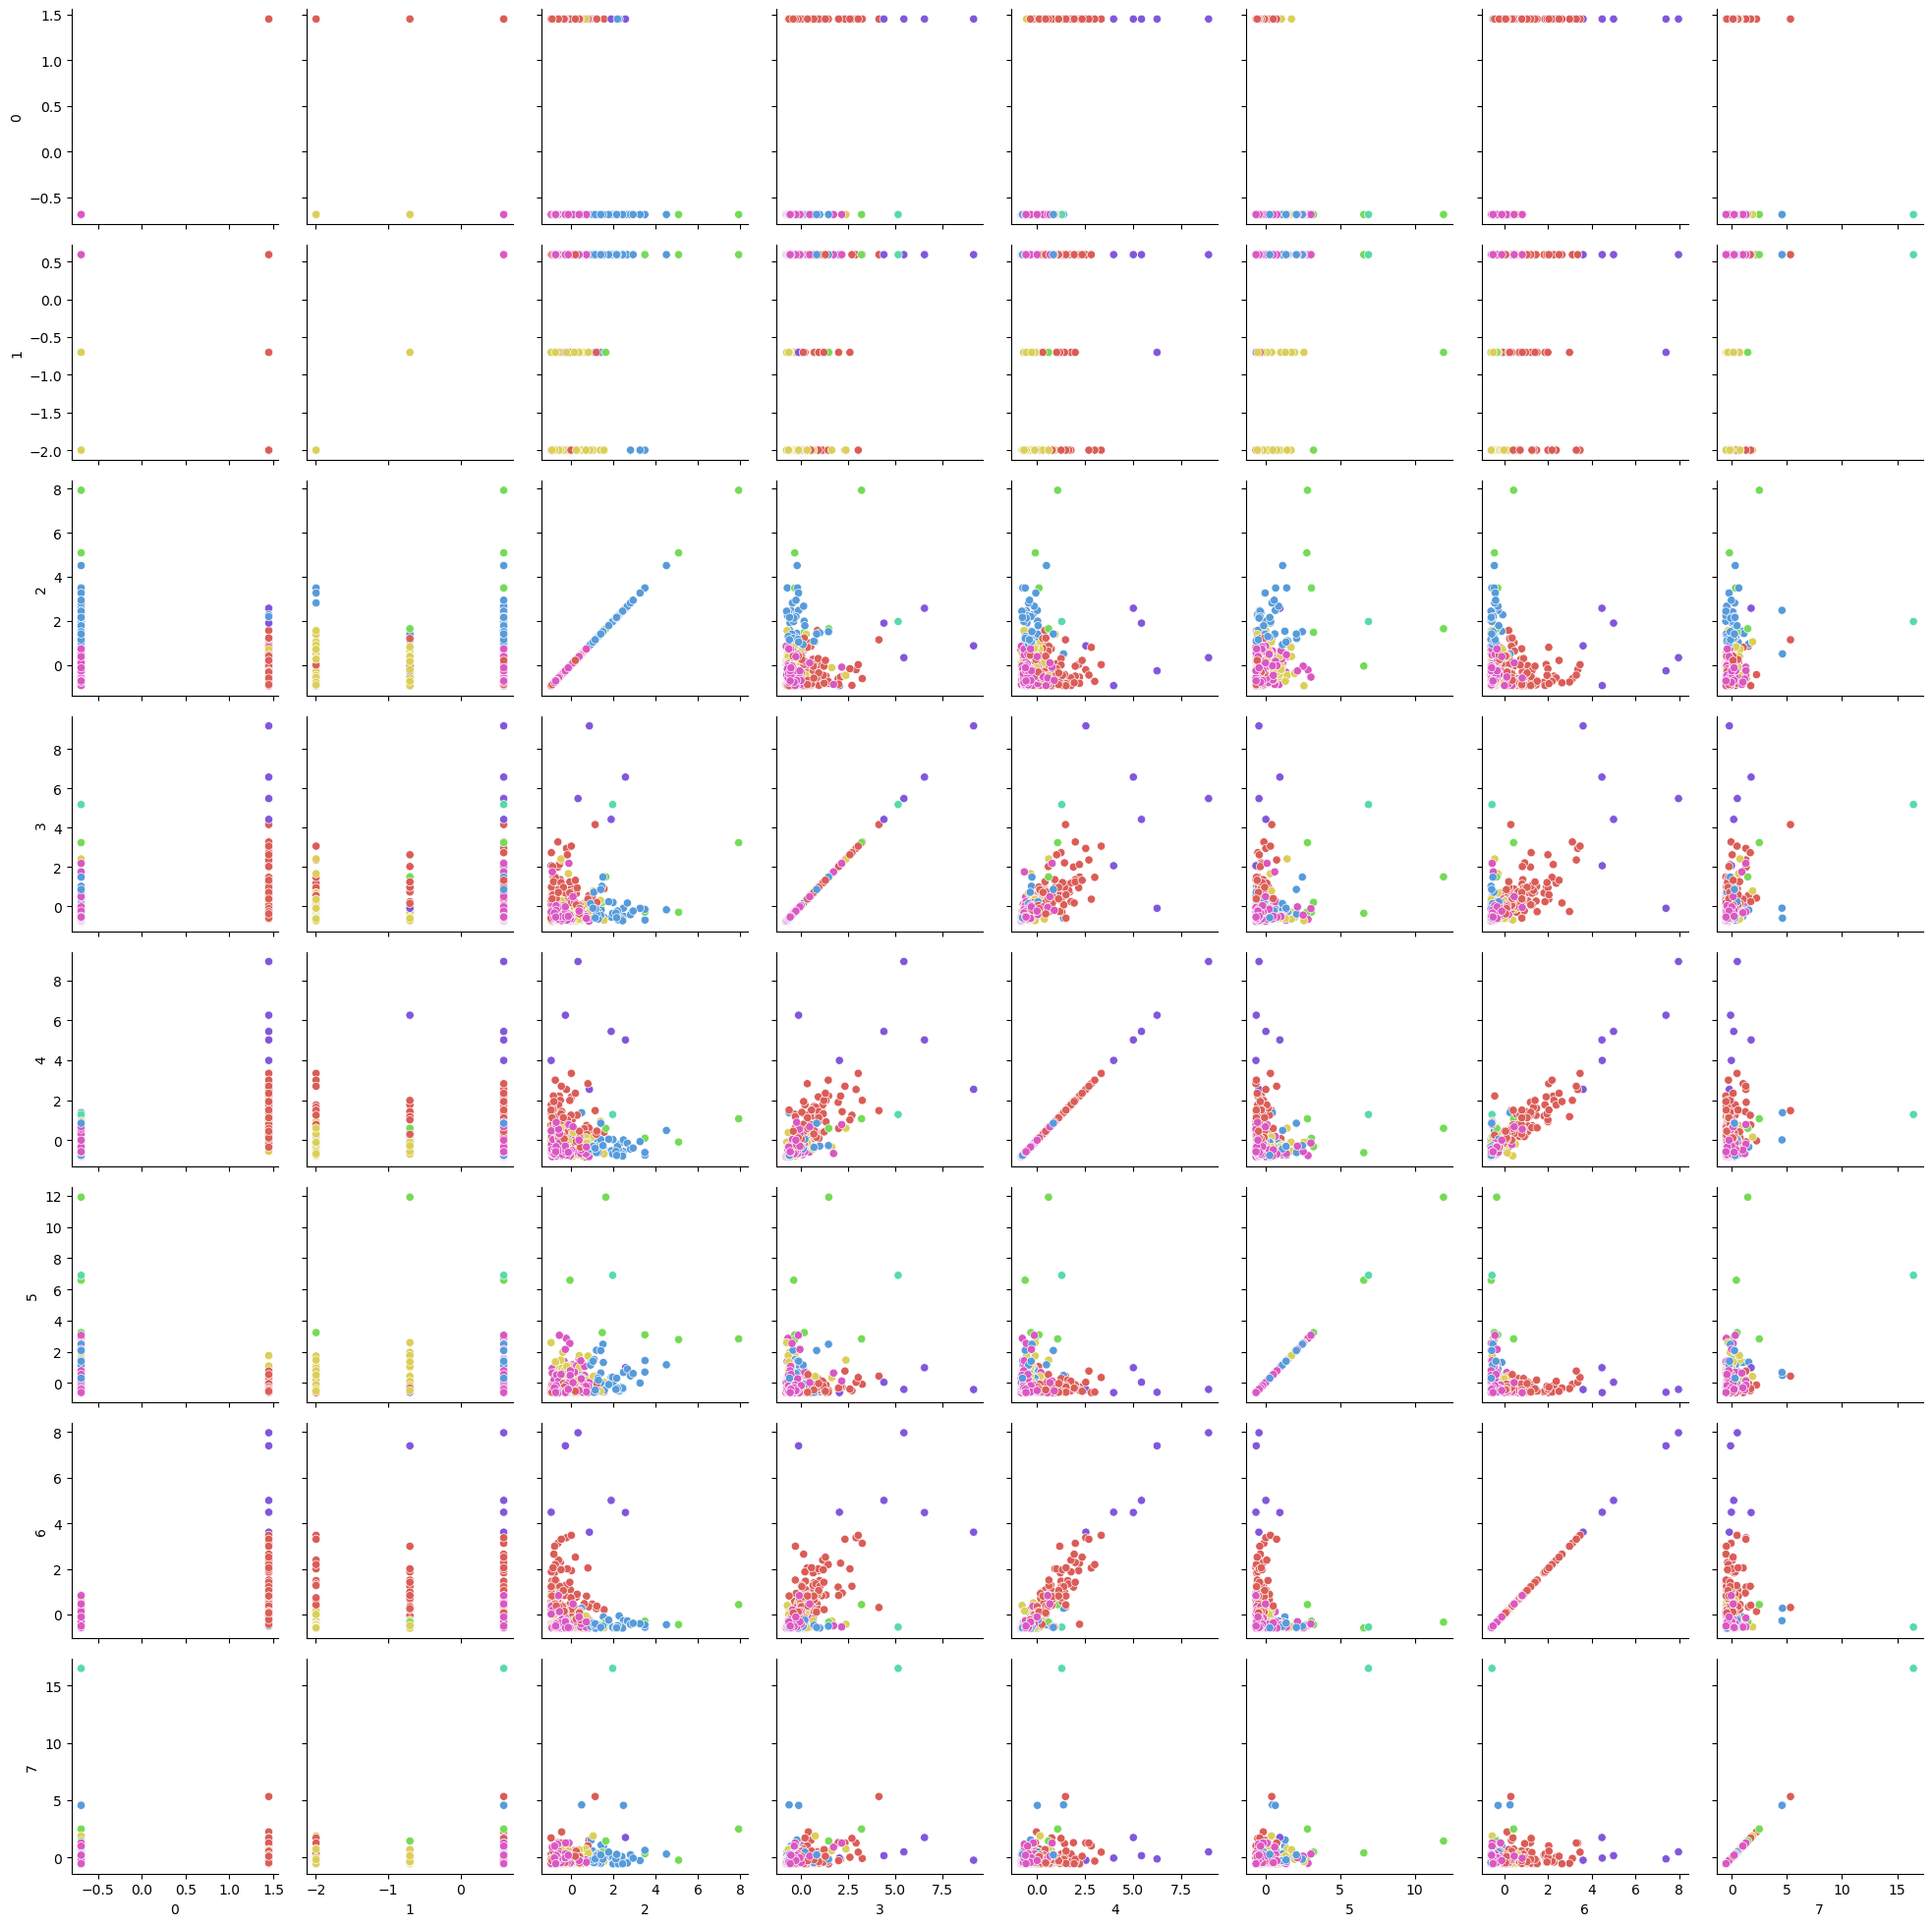

In [20]:
g = sns.PairGrid(frame,vars=frame.columns[:-1], hue="cluster", palette = "hls")
g = g.map(sns.scatterplot)
plt.show()